## 당뇨병 데이터_의사결정 트리 분석 

In [45]:
import pandas as pd

In [46]:
 # 데이터 로드
data = pd.read_csv("./Pima Indians Diabetes Database/diabetes.csv") # 상대경로 지정 
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**데이터 feature 정보**
- Pregnancies : 임신 횟수 
- Glucose : 경구 포도당 내성 검사에서 2시간 후의 혈장 포도당 농도
- BloodPressure : 이완기 혈압(mmHg)
- SkinThickness : 삼두근 피부 주름 두께(mm)
- Insulin : 2시간 혈청 인슐린(mu U/ml)
- BMI : 체질량지수(체중(kg)/키(m)^2)
- DiabetesPedigreeFunction : 당뇨병 혈통 기능 
- Age : 나이
- Outcome : 당뇨병 진단 유무,  768개 중 268개가 1(True)이고 나머지는 0(False)

In [47]:
# 데이터 유형 확인 : 결측치 없음 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [48]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [49]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [50]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [51]:
import numpy as np
np.unique(data["Outcome"], return_counts = True) 
# 종속변수 구성 확인

(array([0, 1]), array([500, 268]))

<Axes: >

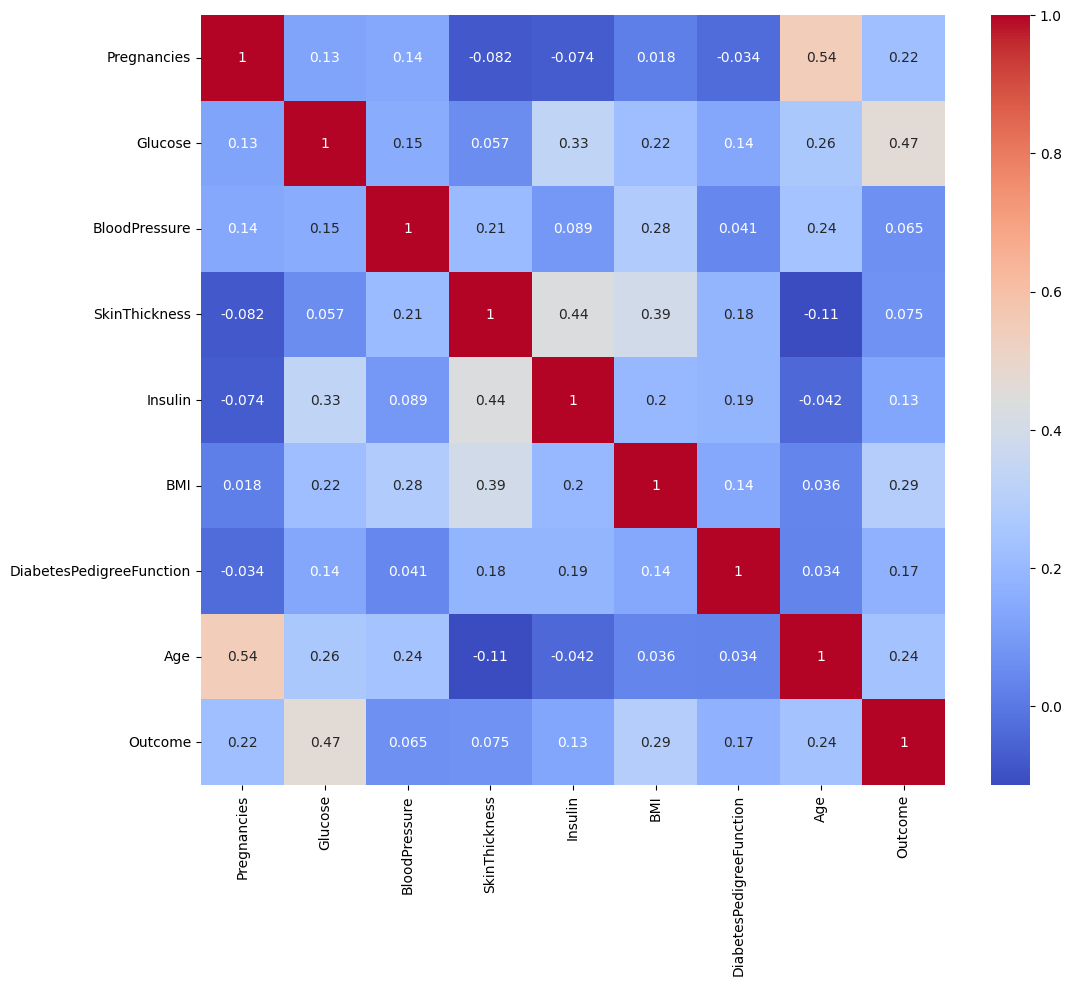

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), cmap='coolwarm', annot =True)

### **데이터 분리**

In [53]:
X = data.drop(["Outcome"], axis = 1) # 종속변수 제거
y = data["Outcome"] # 종속변수만 저장 

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


### **의사결정 트리 모델 생성 및 학습**

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

import pydot
from IPython.core.display import Image
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score


---

In [68]:
parameters = {"max_depth": range(1,10)} # 트리의 깊이 1~10개 중 최적의 파라미터 확인 

In [58]:
decision_tree = DecisionTreeClassifier(criterion = "gini", min_samples_split = 30)

In [59]:
from sklearn.model_selection import GridSearchCV

grid_search_kf = GridSearchCV(decision_tree, # 수행할 모델 종류
                           parameters, # 탐색할 하이퍼 파라미터 
                           n_jobs = -1, # 병렬 처리할 CPU 코어의 수, -1은 사용한 모든 코어 사용(학습속도 증가)
                           cv = 3,  # k=3인 k-fold 수행 : 교차검증을 따로 수행할 필요 X
                           scoring = "roc_auc") # roc 곡선 아래 면적을 분류 평가 지표로 설정 

In [60]:
grid_search_kf.fit(X_train, y_train) # 모델 학습 

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(min_samples_split=30),
             n_jobs=-1, param_grid={'max_depth': range(1, 10)},
             scoring='roc_auc')

In [61]:
print("Best Parameters:", grid_search_kf.best_params_)
print("Best ROC AUC:", grid_search_kf.best_score_)

Best Parameters: {'max_depth': 5}
Best ROC AUC: 0.7997441275332307


In [62]:
grid_search_kf_best = grid_search_kf.best_estimator_

export_graphviz(grid_search_kf_best, out_file = "diabetes3.dot", feature_names = X.columns, 
               class_names = ['0','1'], rounded=True, filled=True, impurity=True)

In [63]:
graph3 = pydot.graph_from_dot_file("diabetes3.dot")[0]

iris_png3 = graph3.create_png()

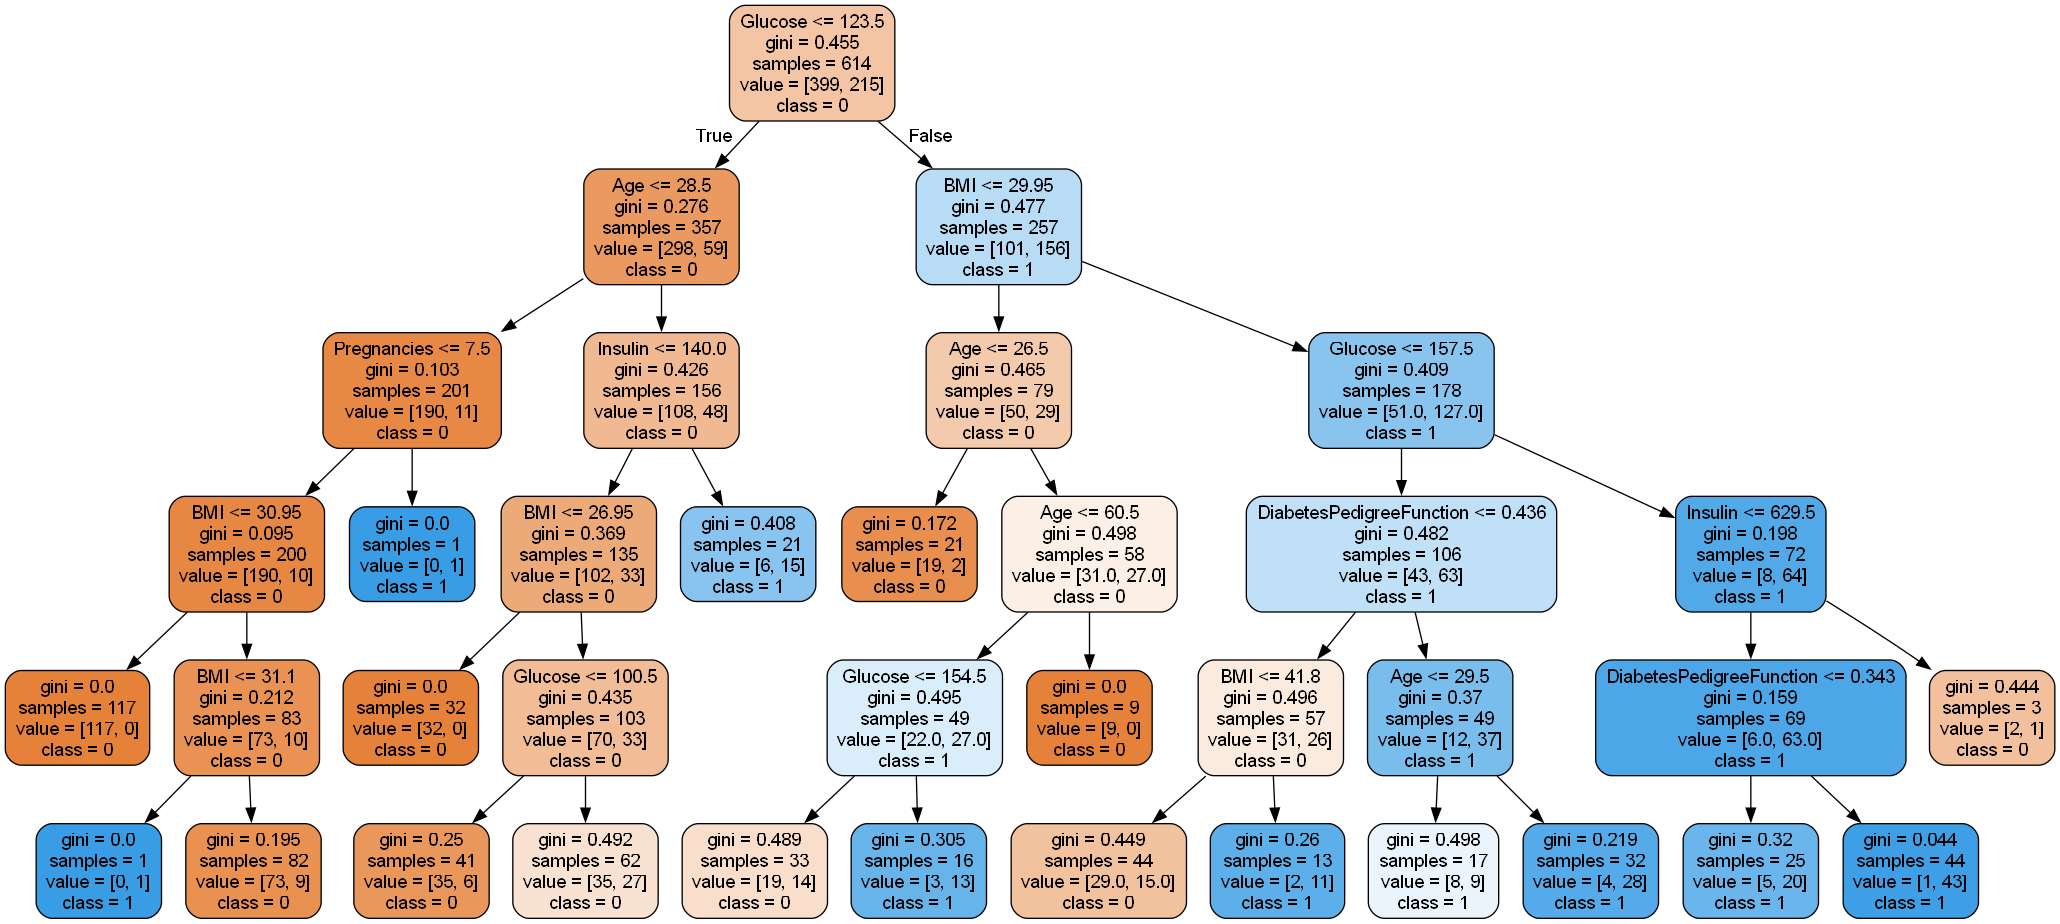

In [69]:
Image(iris_png3)

**데이터 feature 정보**
- Pregnancies : 임신 횟수 
- Glucose : 경구 포도당 내성 검사에서 2시간 후의 혈장 포도당 농도
- BloodPressure : 이완기 혈압(mmHg)
- SkinThickness : 삼두근 피부 주름 두께(mm)
- Insulin : 2시간 혈청 인슐린(mu U/ml)
- BMI : 체질량지수(체중(kg)/키(m)^2)
- DiabetesPedigreeFunction : 당뇨병 혈통 기능 
- Age : 나이
- Outcome : 당뇨병 진단 유무,  768개 중 268개가 1(True)이고 나머지는 0(False)

In [65]:
for colname, importance in zip(X_train.columns, tree2.feature_importances_):
    print("{}:{}".format(colname, importance)) 

Pregnancies:0.0
Glucose:0.7052582406663213
BloodPressure:0.0
SkinThickness:0.0
Insulin:0.0
BMI:0.15879694599631608
DiabetesPedigreeFunction:0.0
Age:0.13594481333736264


In [66]:
# test로 y값 예측 
y_pred_kf = decision_tree_kf_best.predict(X_test) 
y_pred_kf

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [67]:
accuracy_score(y_test, y_pred_kf) # 정확도 확인 

0.7207792207792207